In [3]:
#!pip install alpha_vantage

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import requests

API_key = 'S3DCI8BVT4ZHI0EI'
ts = TimeSeries(key = API_key, output_format='pandas')
data = ts.get_weekly_adjusted('AAPL')
datos =data[0]

In [5]:
df = pd.DataFrame(datos)
df['Volumen'] = df['6. volume'].apply(lambda x: '{:,.0f}'.format(x))
df = df.rename(columns={'4. close': 'Close'})
df[['Close','Volumen']]

,Close,Volumen
date,,
2024-04-19,165.00,"309,416,498"
2024-04-12,176.55,"321,898,799"
2024-04-05,169.58,"233,688,457"
2024-03-28,171.48,"237,622,732"
2024-03-22,172.28,"361,583,938"
...,...,...
1999-12-10,103.00,"25,152,800"
1999-12-03,115.00,"28,046,300"
1999-11-26,95.06,"9,757,600"


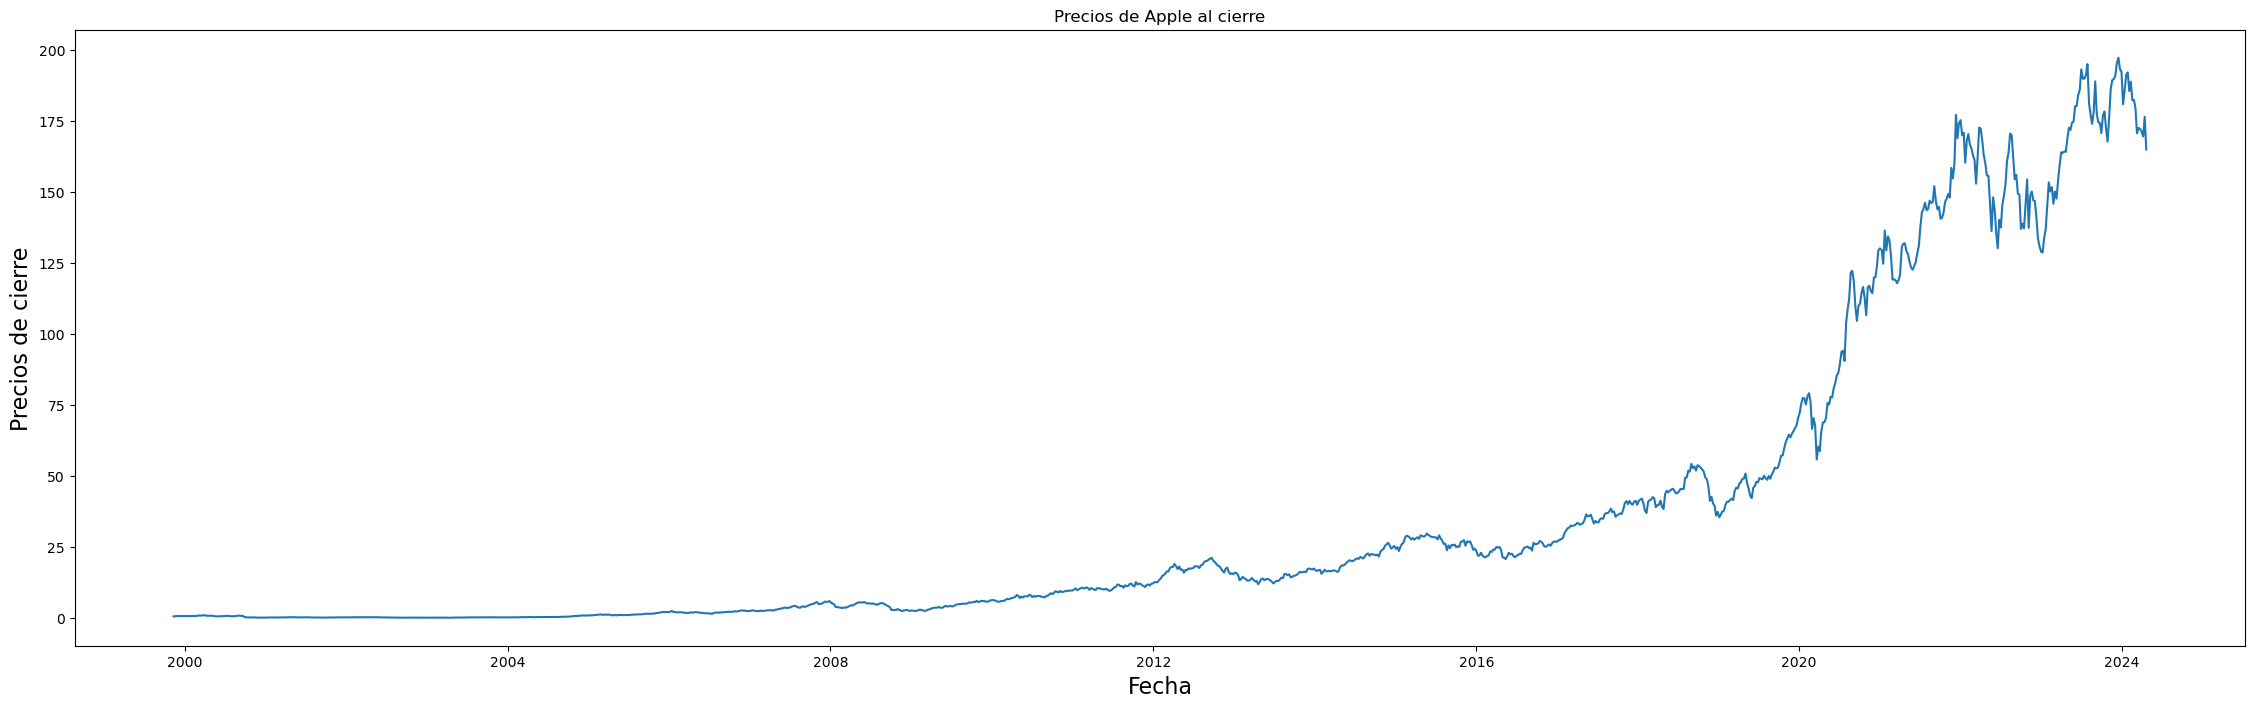

In [6]:
#visualize data in a chart
plt.figure(figsize=(28,8))
plt.title('Precios de Apple al cierre')
plt.xlabel('Fecha',fontsize=16)
plt.ylabel('Precios de cierre',fontsize=16)
plt.plot(df['5. adjusted close'])
plt.show()

In [7]:
from alpha_vantage.fundamentaldata import FundamentalData
key = 'S3DCI8BVT4ZHI0EI'
fd = FundamentalData(key, output_format = 'pandas')
data = fd.get_income_statement_annual('AAPL')
datos_f = data[0]

In [8]:

df = pd.DataFrame(datos_f)
df.T

date,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000005,1970-01-01 00:00:00.000000006,1970-01-01 00:00:00.000000007,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000009,1970-01-01 00:00:00.000000010,1970-01-01 00:00:00.000000011,1970-01-01 00:00:00.000000012,1970-01-01 00:00:00.000000013,1970-01-01 00:00:00.000000014
fiscalDateEnding,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30,2018-09-30,2017-09-30,2016-09-30,2015-09-30,2014-09-30,2013-09-30,2012-09-30,2011-09-30,2010-09-30,2009-09-30
reportedCurrency,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
grossProfit,169148000000,170782000000,152836000000,104956000000,98392000000,101839000000,88186000000,84263000000,93626000000,70537000000,64304000000,68662000000,43818000000,25684000000,17222000000
totalRevenue,379352000000,391397000000,363172000000,271642000000,256598000000,265595000000,229234000000,215639000000,232982000000,182411000000,170774000000,156508000000,108249000000,65225000000,42905000000
costOfRevenue,239069000000,248640000000,234954000000,189475000000,180027000000,163756000000,141048000000,131376000000,163618000000,131151000000,123236000000,100486000000,73630000000,45873000000,29832000000
costofGoodsAndServicesSold,214137000000,223546000000,212981000000,169559000000,161782000000,163756000000,141048000000,131376000000,140089000000,112258000000,106606000000,87846000000,64431000000,39541000000,25683000000
operatingIncome,114301000000,119437000000,108949000000,66288000000,63930000000,70898000000,61344000000,60024000000,71230000000,52503000000,48999000000,55241000000,33790000000,18385000000,11740000000
sellingGeneralAndAdministrative,24932000000,25094000000,21973000000,19916000000,18245000000,16705000000,15261000000,14194000000,14329000000,11993000000,10830000000,10040000000,7599000000,5517000000,4149000000
researchAndDevelopment,29915000000,26251000000,21914000000,18752000000,16217000000,14236000000,11581000000,10045000000,8067000000,6041000000,4475000000,3381000000,2429000000,1782000000,1333000000
operatingExpenses,54847000000,51345000000,43887000000,38668000000,34462000000,30941000000,26842000000,24239000000,22396000000,18034000000,15305000000,13421000000,10028000000,7299000000,5482000000


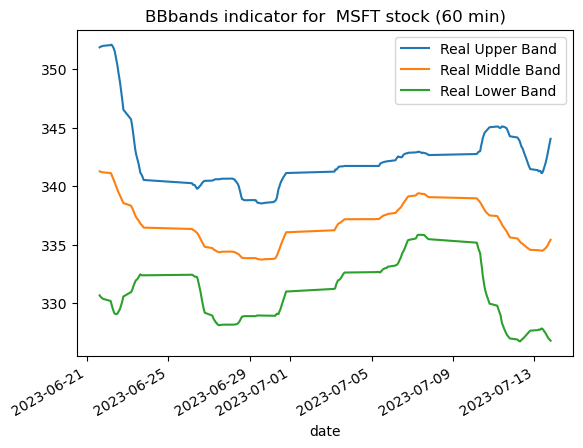

In [25]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

In [9]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances('S3DCI8BVT4ZHI0EI', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

ValueError: Error getting data from the api, no return was given.

In [10]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='YOUR_API_KEY')
# There is no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency='BTC',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'BTC',
 '2. From_Currency Name': 'Bitcoin',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '64664.97000000',
 '6. Last Refreshed': '2024-04-20 16:28:02',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '64664.97000000',
 '9. Ask Price': '64664.98000000'}


In [11]:


# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey= S3DCI8BVT4ZHI0EI'
r = requests.get(url)
data = r.json()

print(data)

{'metadata': 'Top gainers, losers, and most actively traded US tickers', 'last_updated': '2024-04-19 16:16:00 US/Eastern', 'top_gainers': [{'ticker': 'RMGCW', 'price': '0.0481', 'change_amount': '0.045', 'change_percentage': '1451.6129%', 'volume': '554884'}, {'ticker': 'TWG', 'price': '3.73', 'change_amount': '1.88', 'change_percentage': '101.6216%', 'volume': '35928407'}, {'ticker': 'CSLR', 'price': '0.45', 'change_amount': '0.1825', 'change_percentage': '68.2243%', 'volume': '11612884'}, {'ticker': 'DAVEW', 'price': '0.053', 'change_amount': '0.0207', 'change_percentage': '64.0867%', 'volume': '17725'}, {'ticker': 'LEXXW', 'price': '1.24', 'change_amount': '0.48', 'change_percentage': '63.1579%', 'volume': '974'}, {'ticker': 'EVTL+', 'price': '0.0798', 'change_amount': '0.0286', 'change_percentage': '55.8594%', 'volume': '240'}, {'ticker': 'JTAIW', 'price': '0.0335', 'change_amount': '0.0119', 'change_percentage': '55.0926%', 'volume': '27674'}, {'ticker': 'CRMLW', 'price': '0.26', 

In [12]:
symbol = "AAPL"  # Replace with the desired stock symbol

url = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey= S3DCI8BVT4ZHI0EI"
response = requests.get(url)

data = response.json()
pe_ratio = data.get("PERatio")
print(f"P/E Ratio for {symbol}: {pe_ratio}")



P/E Ratio for AAPL: 25.66
